In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

## Data

The dataset comprises 3 files:

    **Train.csv: **[10000 x 12 excluding the headers] contains Training data
    **Test.csv: **[2500 x 11 excluding the headers] contains Test data
    **sample_submission.csv: **contains a sample of the format in which the Results.csv needs to be

Columns 	Description
1. Accident_ID 	unique id assigned to each row
2. Accident_Type_Code 	the type of accident (factor, not numeric)
3. Cabin_Temperature 	the last recorded temperature before the incident, measured in degrees fahrenheit
4. Turbulence_In_gforces 	the recorded/estimated turbulence experienced during the accident
5. Control_Metric 	an estimation of how much control the pilot had during the incident given the factors at play
6. Total_Safety_Complaints 	number of complaints from mechanics prior to the accident
7. Days_Since_Inspection 	how long the plane went without inspection before the incident
8. Safety_Score 	a measure of how safe the plane was deemed to be
9. Violations 	number of violations that the aircraft received during inspections
10. Severity  	(Highly_Fatal_And_Damaging,
Significant_Damage_And_Serious_Injuries,
Minor_Damage_And_Injuries,
Significant_Damage_And_Fatalities) 	a description (4 level factor) on the severity of the crash [Target]

    Target: Severity


### Le's start by loading the datasets 

In [3]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


## 1. Exploratory Data Analysis

In [5]:
train.columns.to_frame(index=False)

,0
0,Severity
1,Safety_Score
2,Days_Since_Inspection
3,Total_Safety_Complaints
4,Control_Metric
5,Turbulence_In_gforces
6,Cabin_Temperature
7,Accident_Type_Code
8,Max_Elevation
9,Violations


In [6]:
test.columns.to_frame(index=False)

,0
0,Safety_Score
1,Days_Since_Inspection
2,Total_Safety_Complaints
3,Control_Metric
4,Turbulence_In_gforces
5,Cabin_Temperature
6,Accident_Type_Code
7,Max_Elevation
8,Violations
9,Adverse_Weather_Metric


 **This display the  column labels of the DataFrame.**


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


**This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.**

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


**Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values. <br>
Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.**<br>
The T is used to transpose the output of describe.

In [9]:
# Now let's us inspect our target variable.
train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [10]:
train['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Minor_Damage_And_Injuries'),
  Text(1, 0, 'Significant_Damage_And_Fatalities'),
  Text(2, 0, 'Significant_Damage_And_Serious_Injuries'),
  Text(3, 0, 'Highly_Fatal_And_Damaging')])

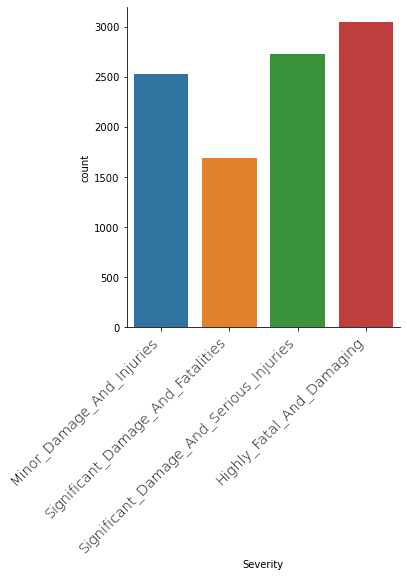

In [11]:
sns.catplot(x='Severity', data = train, kind='count', orient=60)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [12]:
# now lets check if we have missing values or not
train.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [13]:
test.isna().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

*we can see here that we are not dilling with missing values which is a good thing in this case*

In [14]:
train.Violations.value_counts()

2    3793
1    2398
3    2376
0     696
4     675
5      62
Name: Violations, dtype: int64

<AxesSubplot:>

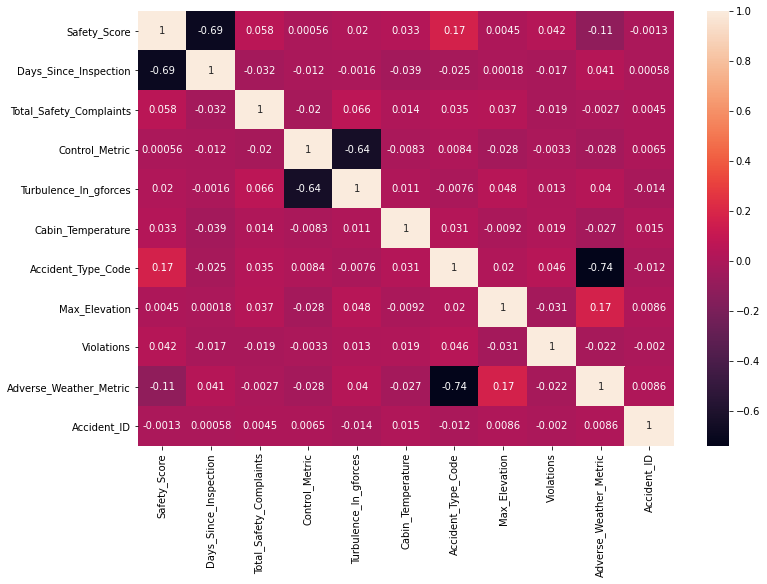

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)

In [16]:
train.Severity.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

Our target is a categorical so we have to encode it. 

### Encoding the target variable

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()
train.Severity = encoder.fit_transform(train.Severity)

In [19]:
encoder.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [20]:
train.Severity.head(10)

0    1
1    1
2    2
3    3
4    2
5    1
6    0
7    1
8    0
9    3
Name: Severity, dtype: int64

## 2. Feature selection is one of the most import ant part of our machine leanring because it will not only give us good performence model but also it will pay on the cost of computation.
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features..

Univariate Selection
Statistical tests can be used to select those independent features that have the strongest relationship with the target feature in your dataset.E.g. Chi squared test.

In [21]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
X = train.drop("Severity",1)
y = train.Severity

In [23]:
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,y)
trainscores = pd.DataFrame(fit.scores_)
traincolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([traincolumns,trainscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                      Specs         Score
7             Max_Elevation  37871.221260
0              Safety_Score   8552.477911
10              Accident_ID   3180.018341
3            Control_Metric   1017.270613
6        Accident_Type_Code    658.840259
9    Adverse_Weather_Metric    160.457298
2   Total_Safety_Complaints     53.652473
8                Violations     27.817094
1     Days_Since_Inspection     23.452196
4     Turbulence_In_gforces      6.544339
5         Cabin_Temperature      0.426112


In [24]:
# another way 

[0.20192928 0.13700651 0.05033996 0.13178854 0.06959329 0.05275124
 0.16455004 0.05180508 0.03776641 0.05187047 0.05059917]


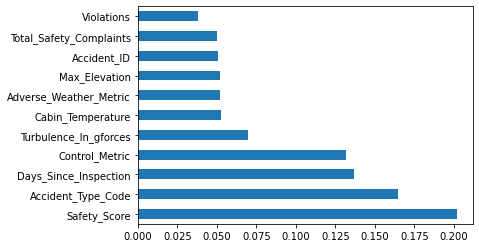

In [25]:
model = ExtraTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [26]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(train.corr()['Severity']).sort_values(ascending = False)) 

features_corr

,Severity
Severity,1.000000
Accident_Type_Code,0.212203
Safety_Score,0.205276
Adverse_Weather_Metric,0.153946
Turbulence_In_gforces,0.035977
Violations,0.026349
Total_Safety_Complaints,0.010642
Cabin_Temperature,0.008819
Accident_ID,0.008583
Max_Elevation,0.005572


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
logmodel = LogisticRegression(max_iter=500,)
logmodel.fit(X_train,y_train)

/home/balde/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = logmodel.predict(X_test)
# Get error rate
print("Error rate of LogisticRegression: ", 1 - accuracy_score(y_test, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_test)


Error rate of LogisticRegression:  0.6024


array([[534, 163, 160, 351],
       [123, 270, 211, 156],
       [ 20,  36,   9,  14],
       [ 77, 158,  37, 181]])

In [37]:
# import classification algorithm 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# import cross valiadation method 
from sklearn.model_selection import cross_val_score

In [32]:
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "BC": BaggingClassifier(),
    "EXT": ExtraTreesClassifier(),
    "HGB": HistGradientBoostingClassifier()
}



for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Train SVM
List of scores for SVM: [0.306 0.306 0.306 0.306 0.306]
The mean score for SVM: 0.306
-------------The End------------------
Train KNN
List of scores for KNN: [0.28       0.28333333 0.26666667 0.26533333 0.27533333]
The mean score for KNN: 0.27413333333333334
-------------The End------------------
Train RF
List of scores for RF: [0.90933333 0.90066667 0.90933333 0.908      0.91333333]
The mean score for RF: 0.9081333333333333
-------------The End------------------
Train GB
List of scores for GB: [0.856      0.854      0.85533333 0.86533333 0.872     ]
The mean score for GB: 0.8605333333333333
-------------The End------------------
Train DTC
List of scores for DTC: [0.9        0.914      0.91733333 0.91933333 0.91133333]
The mean score for DTC: 0.9124000000000001
-------------The End------------------
Train BC
List of scores for BC: [0.92733333 0.93466667 0.92466667 0.93066667 0.93533333]
The mean score for BC: 0.9305333333333333
-------------The End------------------
Train EX

## Now some algorithm requre scaling of the data.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_scale = scaler.fit_transform(X_train)

In [38]:
models = {
    "LogR":LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "BC": BaggingClassifier(),
    "EXT": ExtraTreesClassifier(),
    "HGB": HistGradientBoostingClassifier()
}



for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_scale, y_train, cv=5, scoring='accuracy')

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Train LogR
List of scores for LogR: [0.62533333 0.62733333 0.626      0.62466667 0.63933333]
The mean score for LogR: 0.6285333333333334
-------------The End------------------
Train SVM
List of scores for SVM: [0.852      0.85933333 0.85666667 0.844      0.842     ]
The mean score for SVM: 0.8507999999999999
-------------The End------------------
Train KNN
List of scores for KNN: [0.638      0.65333333 0.64133333 0.63933333 0.62866667]
The mean score for KNN: 0.6401333333333333
-------------The End------------------
Train RF
List of scores for RF: [0.91466667 0.89533333 0.91266667 0.90733333 0.90933333]
The mean score for RF: 0.9078666666666667
-------------The End------------------
Train GB
List of scores for GB: [0.856      0.854      0.856      0.86533333 0.872     ]
The mean score for GB: 0.8606666666666666
-------------The End------------------
Train DTC
List of scores for DTC: [0.90266667 0.91533333 0.91533333 0.91666667 0.92      ]
The mean score for DTC: 0.914
-------------The 

## Now let's us perform gridsearch

In [39]:
from sklearn.model_selection import GridSearchCV

In [44]:
my_model = HistGradientBoostingClassifier()


# Optimize model paramaters 

param_grid = {'learning_rate': [0.1, 0.05],
              'max_iter':[100,300,700],
        'max_depth': [3, 4, 5,7]
        }
model_hgb = GridSearchCV(my_model, param_grid,cv=5, verbose=3)

#train to find the best parameters 
model_hgb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] learning_rate=0.1, max_depth=3, max_iter=100 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, max_iter=100, score=0.877, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, max_iter=100 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_iter=100, score=0.893, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_iter=100 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_iter=100, score=0.901, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_iter=100 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=100, score=0.900, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_iter=100 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=100, score=0.897, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.940, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.935, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.930, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.942, total=   2.3s
[CV] learning_rate=0.

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 11.3min finished


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05],
                         'max_depth': [3, 4, 5, 7],
                         'max_iter': [100, 300, 700]},
             verbose=3)